# Assignment 3 

## Objective

The goal is to investigate supervised learning algorithms for article classification on BBC news datasets using NB, kNN, SVM, and NNs. 

## Task 1: Exploratory Data Analytics

### (a) Feature vectorization and summary table

In [1]:
# Load libraries
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('train.csv')

# df info
print(df.head(), '\n') # glimpse first few rows
print(df.shape, '\n') # 1000 rows, 3 columns
print(df.info(), '\n') # no missing values 
print(df['Category'].value_counts()) # even distribution of categories


   ArticleId                                               Text       Category
0       1976  lifestyle governs mobile choice faster better ...           tech
1       1797  french honour director parker british film dir...  entertainment
2       1866  fockers fuel festive film chart comedy meet fo...  entertainment
3       1153  housewives lift channel 4 ratings debut us tel...  entertainment
4        342  u2 desire number one u2 three prestigious gram...  entertainment 

(428, 3) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  428 non-null    int64 
 1   Text       428 non-null    object
 2   Category   428 non-null    object
dtypes: int64(1), object(2)
memory usage: 10.2+ KB
None 

Category
tech             216
entertainment    212
Name: count, dtype: int64


In [2]:
# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(df['Text']) # USE X_tfidf FOR MODEL BUILDING

# Print num articles and features
print("Number of articles:", X_tfidf.shape[0])
print("Number of features (unique words):", X_tfidf.shape[1])

# Show features for 5 articles
feature_names = tfidf_vectorizer.get_feature_names_out()
sample_df = pd.DataFrame(
    X_tfidf[:5].toarray(),
    columns=feature_names[:]
)
sample_df['ArticleId'] = df['ArticleId'][:5].values
sample_df['Category'] = df['Category'][:5].values

print("\nSample of 5 articles with TF-IDF features (first 10 shown):\n")
print(sample_df)

Number of articles: 428
Number of features (unique words): 13518

Sample of 5 articles with TF-IDF features (first 10 shown):

    00       000  000th  001st  0051  007  0100  0130  028   05  ...  zombies  \
0  0.0  0.020115    0.0    0.0   0.0  0.0   0.0   0.0  0.0  0.0  ...      0.0   
1  0.0  0.000000    0.0    0.0   0.0  0.0   0.0   0.0  0.0  0.0  ...      0.0   
2  0.0  0.000000    0.0    0.0   0.0  0.0   0.0   0.0  0.0  0.0  ...      0.0   
3  0.0  0.000000    0.0    0.0   0.0  0.0   0.0   0.0  0.0  0.0  ...      0.0   
4  0.0  0.000000    0.0    0.0   0.0  0.0   0.0   0.0  0.0  0.0  ...      0.0   

   zone  zonealarm  zones  zoom  zooms   zooropa  zorro  ArticleId  \
0   0.0        0.0    0.0   0.0    0.0  0.000000    0.0       1976   
1   0.0        0.0    0.0   0.0    0.0  0.000000    0.0       1797   
2   0.0        0.0    0.0   0.0    0.0  0.000000    0.0       1866   
3   0.0        0.0    0.0   0.0    0.0  0.000000    0.0       1153   
4   0.0        0.0    0.0   0.0    0

Explanation:

We use `TfidfVectorizer` to convert the news articles into numerical feature vectors based on the TF-IDF (Term Frequency-Inverse Document Frequency) weighting scheme. TF-IDF computes a value for each word in each article based on how frequently the word appears in that article (term frequency) and how rare it is across the entire dataset (inverse document frequency). This helps highlight words that are important for distinguishing one article from another, while down-weighting common words that appear across most documents. 

We choose TF-IDF for model building because it generally improves the performance of classification algorithms like Naive Bayes, kNN, SVM, and Neural Networks by emphasizing informative, distinguishing words. We used TF-IDF in task 1a so that our feature vectors match what will be used by our classifiers. 

However, in task 1b, we use `CountVectorizer` (which gives simple word occurrence counts) for term frequency analysis and plots. This is because term frequency plots are most meaningful when they show raw counts of how often each word appears, which is standard for exploratory data analysis of text. 

Note that news bodies were lower-cased with removal of stop words and special characters, so we do not have to do any further data preprocessing. 

### (b) Term Frequency Analysis and Plots (Counts)


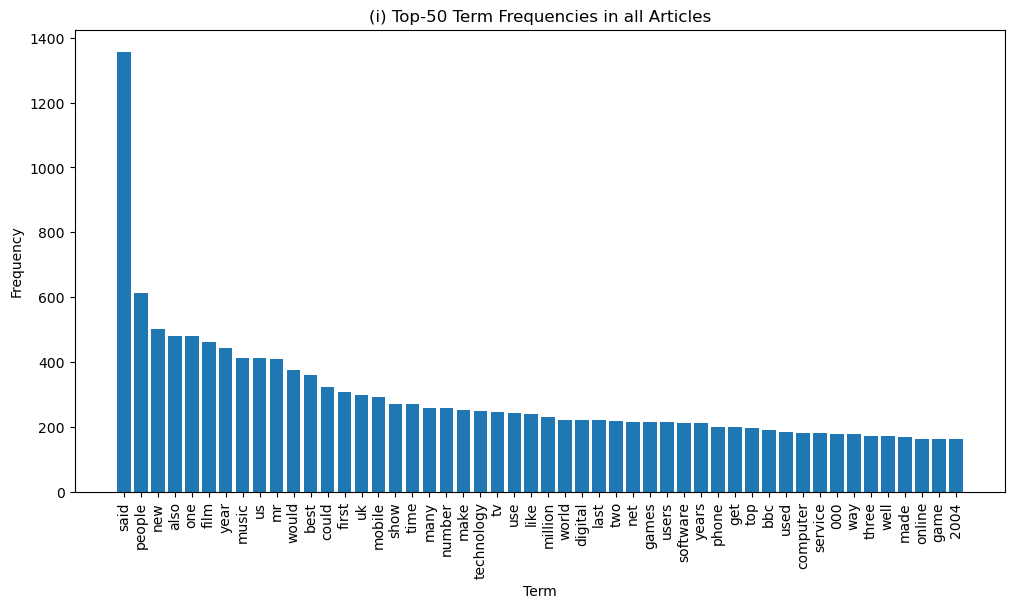

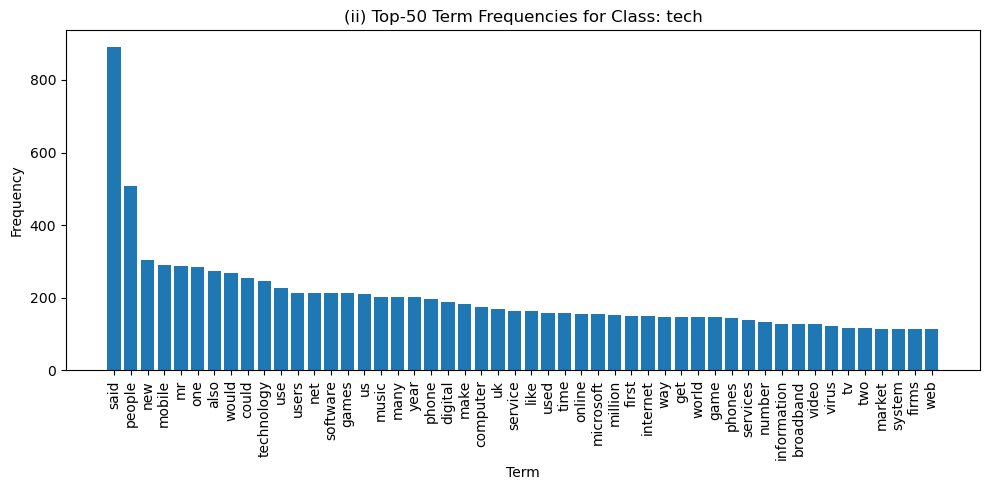

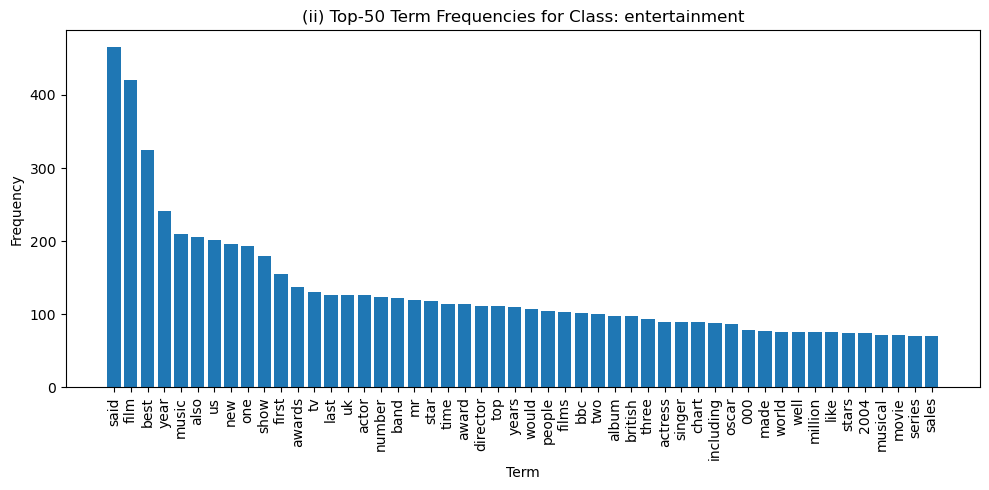

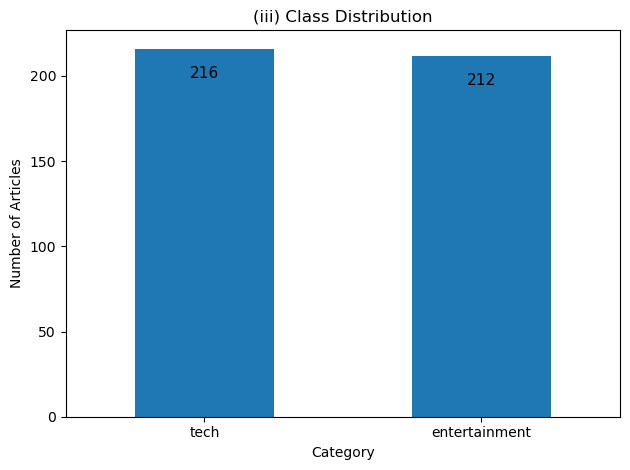

In [3]:
# Raw counts
count_vectorizer = CountVectorizer()
X_counts = count_vectorizer.fit_transform(df['Text'])
word_counts = X_counts.sum(axis=0).A1
terms = count_vectorizer.get_feature_names_out()

### i) Top-50 term distribution
top_50_indices = word_counts.argsort()[::-1][:50]
top_50_terms = terms[top_50_indices]
#print(top_50_terms)
top_50_counts = word_counts[top_50_indices]
#print(top_50_counts)
plt.figure(figsize=(12, 6))
plt.bar(top_50_terms, top_50_counts)
plt.xticks(rotation=90)
plt.title("(i) Top-50 Term Frequencies in all Articles")
plt.xlabel("Term")
plt.ylabel("Frequency")
plt.tight_layout
plt.show()

### ii) Term frequency per class
for cat in df['Category'].unique():
    mask = (df['Category'] == cat).values
    class_counts = X_counts[mask].sum(axis=0).A1
    top_50_indices = class_counts.argsort()[::-1][:50]
    plt.figure(figsize=(10, 5))
    plt.bar(terms[top_50_indices], class_counts[top_50_indices])
    plt.xticks(rotation=90)
    plt.title(f"(ii) Top-50 Term Frequencies for Class: {cat}")
    plt.xlabel("Term")
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()
    
### iii) Class distribution
class_counts = df['Category'].value_counts()
ax = class_counts.plot(kind='bar')
plt.title('(iii) Class Distribution')
plt.ylabel('Number of Articles')
plt.xlabel('Category')
plt.xticks(rotation=0)

# text labels
for i, v in enumerate(class_counts):
    plt.text(
        i, # bar center
        v - 10, # height 
        str(v), # text 
        ha='center', # horiz aligned center
        va='top', # vert aligned top
        fontsize=11
    )
plt.tight_layout()
plt.show()


Comments on the plots:

**(i) Top-50 Term Frequencies in all Articles**
The first plot shows the 50 most frequenct terms across the entire BBC news dataset. Words like "said", "people", and "new" appear at the top, reflecting common themes and reporting styles in the news articles. "Said" is by far the most frequent word, likely because news articles often quote sources or interviewees. While some domain-specific words (such as "music", "film", or "mobile") are present, many frequenct words are common reporting words used in both tech and entertainment articles. 

**(ii) Top-50 Term Frequencies by Class**
- The top terms in tech articles include "mobile", "technology", "users", "software", "games", "phone" etc. which are strongly indicative of technology topics. This suggests that the dataset is well-separated. 

- In contrast, the most frequenct words in entertainment articles are "film", "music", "show", "awards", "actor", "band" etc. which clearly reflects the topics covered in this class. 

While there is some overlap in common words (such as "said", "year", and "tv"), the most distinguishing terms for each class clearly align with their respective domains e.g. "mobile" and "technology" are prominent in tech while "film" and "music" dominate entertainment. 

**(iii) Class distribution**
The final plot shows the distribution of articles by class. The dataset is almost perfectly balanced, with 216 tech articles and 212 entertainment articles. This balanced distribution is advantageous for supervised machine learning, as it will help models learn both classes equally well and prevent bias towards either category. 

## Task 2: Classification Models Learning

### (a) Naive Bayes (NB)

In [4]:
# Code goes here
from sklearn.naive_bayes import MultinomialNB

# Train Naive Bayes model (multinomial)
nb = MultinomialNB()
nb.fit(X_tfidf, df['Category'])


### (i) Top 20 Most Identifiable Words per Class

# Get feature names and class labels
feature_names = tfidf_vectorizer.get_feature_names_out()
class_labels = nb.classes_

top_words = {}
# Get top 20 words for class i, largest log-prob
for i, class_label in enumerate(class_labels):
    top20_idx = np.argsort(nb.feature_log_prob_[i])[::-1][:20]
    top_words[class_label] = feature_names[top20_idx]

# Display
for cls in class_labels:
    print(f"\nTop 20 words most likely to occur in {cls} articles:")
    print(top_words[cls],'\n')
    

### (ii) Top 20 words maximizing the Discriminative Ratio
top_ratio_words = {}
for i, class_label in enumerate(class_labels):
    # Log ratio vs all other classes (as only binary, just the other class)
    log_prob_A = nb.feature_log_prob_[i]
    log_prob_B = nb.feature_log_prob_[1-i]
    log_ratio = log_prob_A - log_prob_B  # log(A/B) = logA - logB
    top20_ratio_idx = np.argsort(log_ratio)[::-1][:20]
    top_ratio_words[class_label] = feature_names[top20_ratio_idx]

# Display:
for cls in class_labels:
    print(f"\nTop 20 discriminative words for {cls} (NB log-ratio):")
    print(top_ratio_words[cls])



Top 20 words most likely to occur in entertainment articles:
['film' 'best' 'said' 'show' 'band' 'music' 'year' 'awards' 'us' 'award'
 'actor' 'album' 'star' 'chart' 'tv' 'also' 'number' 'oscar' 'top' 'new'] 


Top 20 words most likely to occur in tech articles:
['said' 'people' 'mobile' 'software' 'games' 'phone' 'net' 'users'
 'technology' 'mr' 'microsoft' 'virus' 'computer' 'broadband' 'new' 'use'
 'could' 'would' 'digital' 'game'] 


Top 20 discriminative words for entertainment (NB log-ratio):
['film' 'band' 'best' 'actor' 'album' 'chart' 'oscar' 'singer' 'award'
 'actress' 'star' 'musical' 'stars' 'festival' 'comedy' 'awards' 'aviator'
 'theatre' 'rock' 'nominated']

Top 20 discriminative words for tech (NB log-ratio):
['mobile' 'software' 'users' 'microsoft' 'games' 'net' 'technology'
 'virus' 'phone' 'broadband' 'computer' 'phones' 'spam' 'mail' 'firms'
 'use' 'spyware' 'online' 'pc' 'internet']


Explanation of Q2a. 

Here we trained a Naive Bayes (multinomial) classifier on the TF-IDF feature representation of the BBC news articles to classify them as either 'tech' or 'entertainment'. 

(i) displays the 20 words with the highest probability of occurring in each class (P(X_w = 1 | Y = y)) and (ii) displays the top 20 words that maximize the discriminative ratio between the two classes: (P(X_w = 1 | Y= y) / P(X_w = 1 | Y != y)). This equation identifies words that are much more likely to appear in one class than the other. In practice we use the log of this ratio for stability such that, the larger the log-ratio, the more 'distinctive' the word is for that class. 

**Which set of words describes the two classes better?**

The first set for each class (most likely words) contains terms that are highly frequent in that class, but also includes generic reporting terms such as "said" and "new" which are not unique to the topic e.g. the word "said" appears as a top word for both classes, even though it is not specific to tech or entertainment. 

The second set (discriminative log-ratio words) for each class, intead focuses on words that are especially distinctive of each topic. 
- For entertainment, these include domain-specific words such as "film", "band", "actor", "album", "oscar" etc. which are strongly associated with movies and music. 
- For tech, words such as "mobile", "software", "users", "microsoft", "games" etc. clearly relate to technology topics. 

Therefore, the discriminative ratio set better describes and distinguishes each class. These words would be more useful both for human interpretation of class topics and for building classifiers that spearate the two classes. 

### (b) kNN

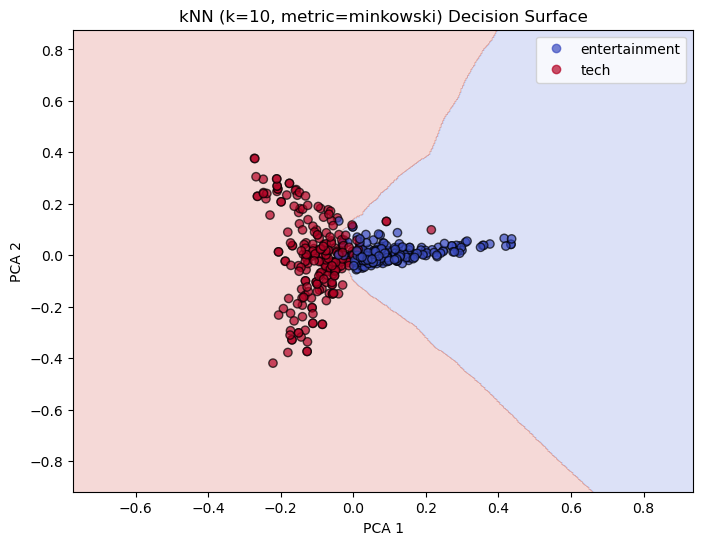

In [5]:
# Code goes here
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

# Set-up TF-IDF features and labels
X = X_tfidf
y = df['Category']
#print(X)
#print(y)
# Label encode y for plotting
le = LabelEncoder()
y_num = le.fit_transform(y) # 'tech' => 1, 'entertainment' => 0
#print(y_num)

# Dimension reduction for visualization: reduce to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

# kNN on PCA projection
k = 10 # k is chosen manually for now
knn = KNeighborsClassifier(n_neighbors=k, metric='minkowski')
knn.fit(X_pca, y_num)

# Create mesh
x_min, x_max = X_pca[:, 0].min() - .5, X_pca[:, 0].max() + .5
y_min, y_max = X_pca[:, 1].min() - .5, X_pca[:, 1].max() + .5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), # mesh grit
                     np.linspace(y_min, y_max, 500))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()]) # predict on mesh grid
Z = Z.reshape(xx.shape)

# Plotting
plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.2, cmap=plt.cm.coolwarm) # fill background colour according to predictions
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_num,
                      cmap=plt.cm.coolwarm, edgecolor='k', alpha=0.7) # plot points coloured by class

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title(f'kNN (k={k}, metric=minkowski) Decision Surface')
label_vals = np.unique(y_num)
plt.legend(
    handles=scatter.legend_elements()[0],
    labels=[le.classes_[i] for i in label_vals]
)
plt.show()

Explanation for Q2b: 

Here, we train a k-nearest neighbours (kNN) classifier with k = 10 and the Euclidean distance metric (Minkowski, p=2) on the BBC articles after projecting the high-dimensional TF-IDF vectors onto the first two principal components using PCA (for visualization purposes). 

In this section, we manually set k=10 for illustration. In Q3 we will tune this hyperparameter and optimize the kNN model's performance. 

The decision sufrace plot above shows the predicted class regions in the 2D PCA space:
- Red region: articles classified as "tech"
- Blue region: articles classified as "entertainment"
Each point corresponds to a projected article, with colour reflecting the true class label. 

**Interpretation:**

The boundary between the two classes is relatively smooth and nonlinear (with k=10 in this case), conforming to the distribution of points in the projected space. The chosen k (number of neighbours) influences the shape of this boundary: 
- Smaller k would make the boundary more jagged and sensitive to noise, possibly resulting in overfitting. 
- Larger k would produce a smootherboundary, potnetially underfitting if too large (as local class details are averaged out). 

The distance metric (Euclidean in this case) determines how 'closeness' is calculated in the feature space, affecting which training samples count as neighbours for each test sample. 

We used PCA to reduce the features to 2D just for visualization. The actual classification model in practice (for performance evaluation) should be trained on all features, not just these two principal components. 

Hence, the kNN boundary adapts flexibly to the underlying data distribution in feature space. The model's sensitivity and ability to separate classes are primarily controlled by the choice of k and the distance metric. These hyperparameters will be tuned for optimization in Q3. 

### (c) SVM

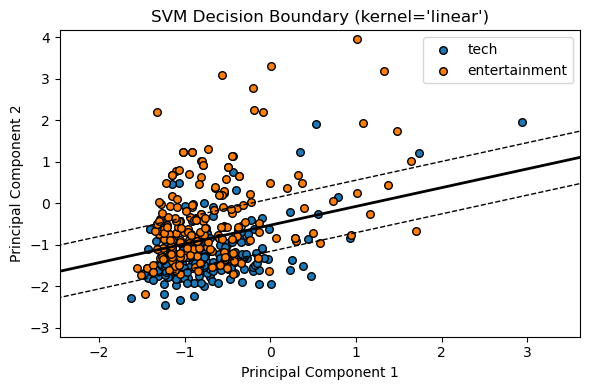

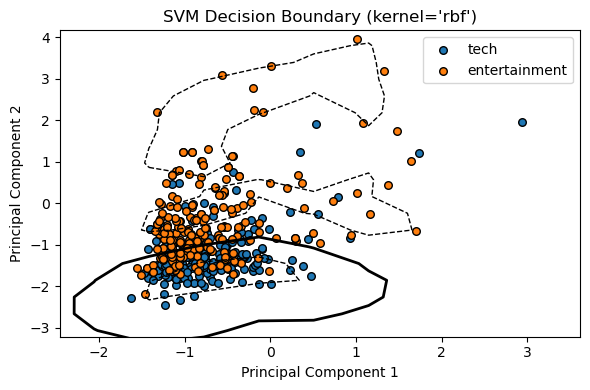

In [6]:
# Code goes here
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# Extract the target variable categories from the DataFrame
y = df['Category']

# Convert the sparse TF-IDF matrix to a dense array
X_dense = X_tfidf.toarray()

# Map categories to numeric codes for SVM compatibility
category_mapper = pd.Categorical(y)
y_numeric = category_mapper.codes  # Numeric encoding of categories
category_names = df['Category']  # Original category names

# Standardise the features to have zero mean and unit variance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_dense)

# Apply PCA to reduce dimensionality to 2 components for visualisation
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Define the penalty parameter for the SVM
C_penalty = 1

# Train a linear SVM on the PCA-transformed data
linear_svm = SVC(kernel='linear', C=C_penalty)
linear_svm.fit(X_pca, y)

# Define the gamma parameter for the RBF kernel
gamma = 1

# Train an RBF kernel SVM on the PCA-transformed data
rbf_svm = SVC(kernel='rbf', gamma=gamma)
rbf_svm.fit(X_pca, y)


# Function to plot the decision boundary of an SVM model
def plot_svc(model, X, y):
    plt.figure(figsize=(6, 4))

    # Plot the data points for each category
    unique_categories = np.unique(y)
    for category in unique_categories:
        plt.scatter(
            X[y == category, 0], X[y == category, 1],  # Select points for the current category
            label=category_names[category],  # Use category names for the legend
            s=30, edgecolors='k'  # Set marker size and edge color
        )
    
    # Get the current axis limits
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Create a grid to evaluate the decision function
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 500),
                         np.linspace(ylim[0], ylim[1], 500))
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary and margins
    plt.contour(xx, yy, Z, levels=[0], linewidths=2, linestyles='solid', colors='k')  # Decision boundary
    plt.contour(xx, yy, Z, levels=[-1, 1], linewidths=1, linestyles='dashed', colors='k')  # Margins

    # Adjust the plot limits to avoid clipping
    x_min, x_max = np.percentile(X[:, 0], [1, 99])
    y_min, y_max = np.percentile(X[:, 1], [1, 99])
    plt.xlim(x_min - 1, x_max + 1)
    plt.ylim(y_min - 1, y_max + 1)

    # Add labels, title and legend
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.title(f"SVM Decision Boundary (kernel='{model.kernel}')")
    plt.legend()
    plt.tight_layout()
    plt.show()





# Plot the decision boundary for the linear SVM
plot_svc(linear_svm, X_pca, y_numeric)

# Plot the decision boundary for the RBF kernel SVM
plot_svc(rbf_svm, X_pca, y_numeric)

**Explanation for SVM**

The first plot above shows the decision boundary (solid black line) and margins (dashed lines) for a linear SVM with a penalty parameter C = 1. The SVM attempts to find a straight line (hyperplane in higher dimensions) that separates the two classes ("tech" and "entertainment") while maximizing the margin and allowing some misclassifications due to the soft margin. 

The penalty C on soft-margin decision boundaries controls the tradeoff between training error and maximising margin.

Small C

- Lower penalty on misclassfiyed training points resulting in a wider margin
- Less sensitive to outliers and noisy data points
- Risk of underfitting as the model is too simple and general

Large C

- Greater penalty on misclassfiyed training points resulting in a tighter margin
- More sensitive to outliers and noisy data points
- Risk of overfitting as the model is to specific on training data

The second plot above shows the non-linear decision boundaries for an SVM with an RBF kernel (gamma=1), again with C=1. Unlike the linear SVM, the RBF kernel can learn complex, curved boundaries that more flexibly adapt to the data distribution. 

Small gamma

- Each training example has a large area of influence
- Decision boundary is smoother, more generalised and less complex
- Model aims for broad patterns potentially leading to underfitting

Large gamma

- Each training example has a very localised area of influence
- Decision boundary is highly complex and irregular
- Model focuses on local patterns, very prone to overfitting the training data

Visualization note:
For interpretability, these plots use only the top two PCA components to project the high-dimensional TF-IDF data into two dimensions. We chose PCA because it captures the directions of greatest variance in the data, making the 2D visualization as informative as possible. Actual model evaluation and hyperparameter tuning (in Q3) uses the full feature set.

**For these plots in particular,**

It is evident from both the linear and RBF SVM decision boundary plots that there is substantial overlap between the 'tech' and 'entertainment' classes in the projected space. Many blue and orange points are intermixed, indicating that the classes are hardly linearly and non-linearly separable with these features and hyperparameters (C=1, gamma=1). This suggests that SVM models may not achieve perfect classification performance, and more informative features or further tuning may be needed. Performance may improve in higher dimensions or optimized hyperparameters, which we will explore in Q3. 



### (d) NN

In [16]:
# Code goes here
# Load libraries
from sklearn.preprocessing import MaxAbsScaler

# Load dataset
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Transform data into valid input to the nn-model. Note x_train = X_tfidf
le = LabelEncoder()
tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorizer.fit(train['Text'])
le.fit(train['Category'])
x_train = tfidf_vectorizer.transform(train['Text'])
y_train = le.transform(train['Category'])
#print(x_train.shape[0])
#print(y_train.shape[0])

x_test = tfidf_vectorizer.transform(test['Text'])
y_test = le.transform(test['Category'])
#print(x_test.shape[0])
#print(y_test.shape[0])

scaler = MaxAbsScaler()
scaler.fit(x_train)

#Hide warnings if you want
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", category=ConvergenceWarning)

In [17]:
def k_fold_data(train, k=5):
        n = len(train)
        fold_size = n // k
        folds = []

        for i in range(k):
            start = i * fold_size
            end = (i + 1) * fold_size if i < k - 1 else n  # handle last fold

            val_set = train.iloc[start:end]
            train_set = pd.concat([train.iloc[:start], train.iloc[end:]])

            folds.append((train_set, val_set))
        
        return folds

five_fold = k_fold_data(train, 5)

In [18]:
from collections import Counter
import numpy as np
from sklearn.neural_network import MLPClassifier 
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score #Some imports that are useful in runnning NN. 

In [19]:
def nn(x_train, y_train, unit_size): #This returns a model for which you can predict upon input of testing datas.
    x = scaler.transform(x_train)
    y = y_train
    clf = MLPClassifier(hidden_layer_sizes=(unit_size,), activation='relu', solver='adam', max_iter=1, random_state=1, warm_start=True)
    clf.fit(x, y_train) #initialise weight here
    rng = np.random.RandomState(1)
    clf.coefs_[0] = rng.uniform(0, 0.1, size=clf.coefs_[0].shape) #deliberately initialise weight again from 0 to 0.1
    clf.max_iter = 100
    clf.fit(x, y)
    
    return clf

def average_entropy_train_loss(y_pred, y_true):
    n = len(y_true)
    loss = 0
    for i in range(n):
        if y_true[i] == 0:
            loss += -np.log(y_pred[i][0])
        else:
            loss += -np.log(y_pred[i][1])
    
    return loss/n

The two lines being hashed above corresponds to initialising the weight uniformally in range[0, 0.1]. But doing this would make the the model predict everything to 0, not sure why.

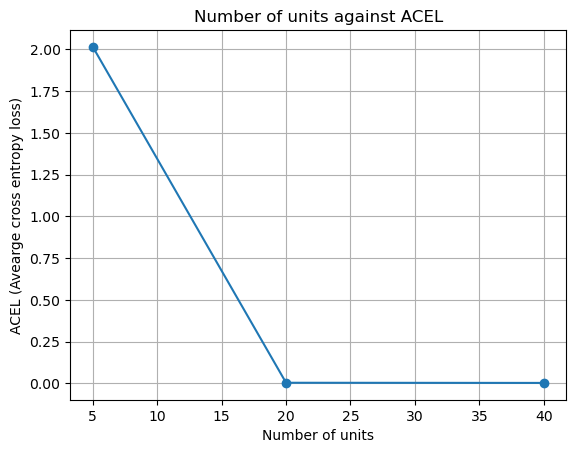

Prediction accuracy:  0.4953271028037383 1.0 1.0


In [11]:
clf5 = nn(x_train, y_train, 5)
clf20 = nn(x_train, y_train, 20)
clf40 = nn(x_train, y_train, 40)

input = scaler.transform(x_train)
pred5 = clf5.predict_proba(input)
pred20 = clf20.predict_proba(input)
pred40 = clf40.predict_proba(input)

number_of_units = [5, 20, 40]
ACELs = [average_entropy_train_loss(pred5, y_train), average_entropy_train_loss(pred20, y_train), average_entropy_train_loss(pred40, y_train)]

plt.plot(number_of_units, ACELs, marker='o')  # 'marker' adds dots at each point
plt.xlabel('Number of units')
plt.ylabel('ACEL (Avearge cross entropy loss)')
plt.title('Number of units against ACEL')
plt.grid(True)
plt.show()

pred5 = clf5.predict(input)
pred20 = clf20.predict(input)
pred40 = clf40.predict(input)

print("Prediction accuracy: ", accuracy_score(y_train, pred5), accuracy_score(y_train, pred20), accuracy_score(y_train, pred40))

*Explain the effect of numbers of hidden units*

## Task 3: Classification Quality Evaluation

### (a) Training Set Size vs Accuracy

*For each model, we are evaluating how accuracy (F1 score) varies with training set size, and plotting all 4 models' curves on the same pair of plots (training and testing accuracy)*


**Naive Bayes**

Classification Results:

   Fraction  Training Size  Train F1   Test F1
0       0.1             42  1.000000  0.559822
1       0.3            128  0.992246  0.981533
2       0.5            214  0.995349  0.963802
3       0.7            299  0.996667  0.963802
4       0.9            385  0.994805  0.972582

Training F1 Scores: [1.0, 0.9922457988130913, 0.995349354197689, 0.9966671310426931, 0.9948051948051949]
Test F1 Scores: [0.5598224362778794, 0.981533356484161, 0.9638019282521352, 0.9638019282521352, 0.9725817428952171]


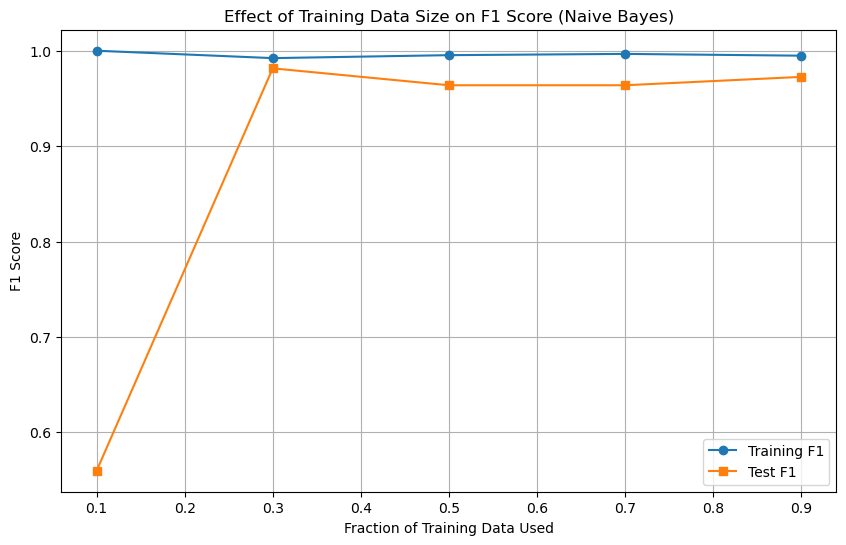

In [12]:
# NB
from sklearn.metrics import precision_score, recall_score

# F1 scores stored here for plotting
train_f1_scores = []
test_f1_scores = []

# Load data
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Prepare features and labels
X_train_full = train_df['Text'].values
y_train_full = train_df['Category'].values
X_test = test_df['Text'].values
y_test = test_df['Category'].values

# Initialize the vectorizer
vectorizer = TfidfVectorizer()

# Transform the entire training data to get the vocabulary
X_train_full_transformed = vectorizer.fit_transform(X_train_full)
X_test_transformed = vectorizer.transform(X_test)

# Total number of samples in training set
N = len(X_train_full)

# Define the fractions of data to use for training
fractions = [0.1, 0.3, 0.5, 0.7, 0.9]
results = []

# Custom F1 calculation
def calculate_f1(precision, recall):
    return 2 * ((precision * recall) / (precision + recall))

# Main loop
for m in fractions:
    # Calculate how many samples to use for training
    train_size = int(m * N)
    
    # Use first m*N samples for training
    X_train_subset = X_train_full_transformed[:train_size]
    y_train_subset = y_train_full[:train_size]
    
    # Train the classifier
    classifier = MultinomialNB()
    classifier.fit(X_train_subset, y_train_subset)
    
    # Evaluate training F1 on the training subset (the data it was trained on)
    train_pred = classifier.predict(X_train_subset)
    train_precision = precision_score(y_train_subset, train_pred, average='weighted')
    train_recall = recall_score(y_train_subset, train_pred, average='weighted')
    train_f1 = calculate_f1(train_precision, train_recall)
    
    # Evaluate testing F1 on the full test set
    test_pred = classifier.predict(X_test_transformed)
    test_precision = precision_score(y_test, test_pred, average='weighted')
    test_recall = recall_score(y_test, test_pred, average='weighted')
    test_f1 = calculate_f1(test_precision, test_recall)
    
    # Save F1 scores for plotting
    train_f1_scores.append(train_f1)
    test_f1_scores.append(test_f1)

    
#
#everything past here can be deleted, only used to show results in a plot
#

    # Store results for table
    results.append({
        'Fraction': m,
        'Training Size': train_size,
        'Train Precision': train_precision,
        'Train Recall': train_recall,
        'Train F1': train_f1,
        'Test Precision': test_precision,
        'Test Recall': test_recall,
        'Test F1': test_f1
    })

# Display results table
results_df = pd.DataFrame(results)
print("Classification Results:\n")
print(results_df[['Fraction', 'Training Size', 'Train F1', 'Test F1']])

# Print raw F1 score lists (optional)
print("\nTraining F1 Scores:", train_f1_scores)
print("Test F1 Scores:", test_f1_scores)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot([r['Fraction'] for r in results], [r['Train F1'] for r in results], marker='o', label='Training F1')
plt.plot([r['Fraction'] for r in results], [r['Test F1'] for r in results], marker='s', label='Test F1')
plt.xlabel('Fraction of Training Data Used')
plt.ylabel('F1 Score')
plt.title('Effect of Training Data Size on F1 Score (Naive Bayes)')
plt.legend()
plt.grid(True)
plt.show()

*Brief explanation of this plot i.e. what's the trend here*

**kNN**

**SVM**

**NN**

In [15]:
# NN
def mportion_nn(x_train, y_train, unit_size, m): #This returns a model for which you can predict upon input of testing datas.
    n = int(x_train.shape[0] * m)
    x_train = x_train[:n]
    y_train = y_train[:n]
    scaler = MaxAbsScaler()
    scaler.fit(x_train)
    x = scaler.transform(x_train)
    y = y_train
    clf = MLPClassifier(hidden_layer_sizes=(unit_size,), activation='relu', solver='adam', max_iter=1, random_state=1, warm_start=True)
    clf.fit(x, y_train) #initialise weight here
    rng = np.random.RandomState(1)
    clf.coefs_[0] = rng.uniform(0, 0.1, size=clf.coefs_[0].shape) #deliberately initialise weight again from 0 to 0.1
    clf.max_iter=100
    clf.fit(x, y)
    
    return clf, scaler

#Assume a unit of 20, we can compute the train_accuracy upon diffeernt size of traing set:

clf10, scaler10 = mportion_nn(x_train, y_train, 20, 0.1)
clf30, scaler30 = mportion_nn(x_train, y_train, 20, 0.3)
clf50, scaler50 = mportion_nn(x_train, y_train, 20, 0.5)
clf70, scaler70 = mportion_nn(x_train, y_train, 20, 0.7)
clf90, scaler90 = mportion_nn(x_train, y_train, 20, 0.9)

input10train, input10test = scaler10.transform(x_train), scaler10.transform(x_test)
input30train, input30test = scaler30.transform(x_train), scaler30.transform(x_test)
input50train, input50test = scaler50.transform(x_train), scaler50.transform(x_test)
input70train, input70test = scaler70.transform(x_train), scaler70.transform(x_test)
input90train, input90test = scaler90.transform(x_train), scaler90.transform(x_test)




print("10 percent f1(train):", f1_score(y_train, clf10.predict(input10train)), "f1(test):", f1_score(y_test, clf10.predict(input10test)))
print("30 percent f1(train):", f1_score(y_train, clf30.predict(input30train)), "f1(test):", f1_score(y_test, clf30.predict(input30test)))
print("50 percent f1(train):", f1_score(y_train, clf50.predict(input50train)), "f1(test):", f1_score(y_test, clf50.predict(input50test)))
print("70 percent f1(train):", f1_score(y_train, clf70.predict(input70train)), "f1(test):", f1_score(y_test, clf70.predict(input70test)))
print("90 percent f1(train):", f1_score(y_train, clf90.predict(input90train)), "f1(test):", f1_score(y_test, clf90.predict(input90test)))





TypeError: Labels in y_true and y_pred should be of the same type. Got y_true=['entertainment' 'tech'] and y_pred=[0 1]. Make sure that the predictions provided by the classifier coincides with the true labels.


*Conclusion of the general trend of the training and testing accuracies.*

### (b) Hyperparameter Impact
*For each model, we are listing the major hyperparameters, assessing their impact (using CV) and comparing them as a set in our discussion*


**NB**

Alpha = 0.01: CV F1 = 0.9771
Alpha = 0.10: CV F1 = 0.9839
Alpha = 0.50: CV F1 = 0.9796
Alpha = 1.00: CV F1 = 0.9772
Alpha = 2.00: CV F1 = 0.9751
Alpha = 5.00: CV F1 = 0.9664
Alpha = 10.00: CV F1 = 0.9579


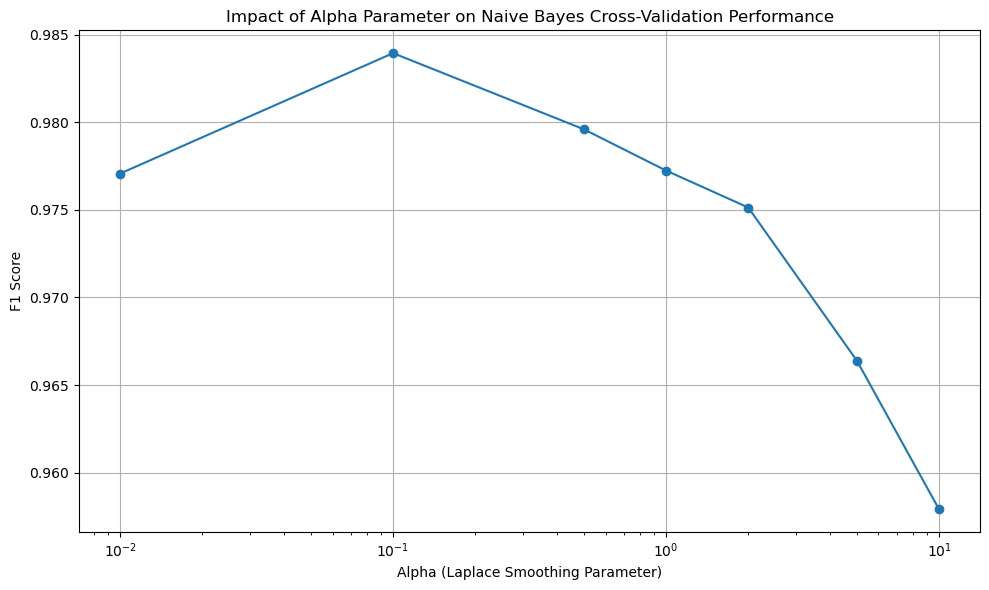

In [ ]:
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import KFold

# Load data
train_df = pd.read_csv('train.csv')

# Prepare features and labels
X_train = train_df['Text'].values
y_train = train_df['Category'].values

# Initialize the TF-IDF vectorizer
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)

# Define alpha values to investigate (Laplace smoothing parameter)
alpha_values = [0.01, 0.1, 0.5, 1.0, 2.0, 5.0, 10.0]

# Custom F1 calculation
def calculate_f1(precision, recall):
    return 2 * ((precision * recall) / (precision + recall))

# Set up 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Store results
cv_results = []

# For each alpha value
for alpha in alpha_values:
    fold_f1_scores = []
    
    # Cross-validation
    for train_index, val_index in kf.split(X_train_tfidf):
        # Split data into training and validation sets
        X_train_fold = X_train_tfidf[train_index]
        y_train_fold = y_train[train_index]
        X_val_fold = X_train_tfidf[val_index]
        y_val_fold = y_train[val_index]
        
        # Train MultinomialNB with current alpha
        nb = MultinomialNB(alpha=alpha)
        nb.fit(X_train_fold, y_train_fold)
        
        # Predict and evaluate on validation set
        y_val_pred = nb.predict(X_val_fold)
        val_precision = precision_score(y_val_fold, y_val_pred, average='weighted')
        val_recall = recall_score(y_val_fold, y_val_pred, average='weighted') 
        val_f1 = calculate_f1(val_precision, val_recall)
        fold_f1_scores.append(val_f1)
    
    # Average F1 score across folds
    mean_cv_f1 = np.mean(fold_f1_scores)
    cv_results.append(mean_cv_f1)
    
    print(f"Alpha = {alpha:.2f}: CV F1 = {mean_cv_f1:.4f}")

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(alpha_values, cv_results, marker='o', label='5-Fold CV F1 Score')
plt.xscale('log')  # Log scale for alpha values
plt.xlabel('Alpha (Laplace Smoothing Parameter)')
plt.ylabel('F1 Score')
plt.title('Impact of Alpha Parameter on Naive Bayes Cross-Validation Performance')
plt.grid(True)
plt.tight_layout()
plt.show()

NB:

Talk about hyperparameter and its impact as in Task 3b

**NN**

In [ ]:
# NN
from sklearn.model_selection import cross_val_score #Why not using this? Because the assignment specifies that the initial weight has to be between [0, 0.1]

def cross_validate(folds, unit_size, activation = 'relu', initialise_weight = True):
    accuracy = 0
    n = len(folds)
    
    for i in range(n):
        tfidf_vectorizer = TfidfVectorizer()
        scaler = MaxAbsScaler()
        tfidf_vectorizer.fit(folds[i][0]['Text'])
        x_train = tfidf_vectorizer.transform(folds[i][0]['Text'])
        scaler.fit(x_train)
        x_train = scaler.transform(x_train)
        y_train = le.transform(folds[i][0]['Category'])
        x_test = tfidf_vectorizer.transform(folds[i][1]['Text'])
        x_test = scaler.transform(x_test)
        y_test = le.transform(folds[i][1]['Category'])
        
        clf = MLPClassifier(hidden_layer_sizes=(unit_size,), activation=activation, solver='adam', max_iter=1, random_state=1, warm_start=True)
        clf.fit(x_train, y_train) #initialise weight here
        if initialise_weight:
            rng = np.random.RandomState(1)
            clf.coefs_[0] = rng.uniform(0, 0.1, size=clf.coefs_[0].shape) #deliberately initialise weight again from 0 to 0.1, which is what cross_val_score() can't do
        clf.max_iter=100
        clf.fit(x_train, y_train)

        y_pred = clf.predict(x_test)
        accuracy += accuracy_score(y_test, y_pred)
    
    return accuracy/n


print("5 units: (logistic)", cross_validate(five_fold, 5, 'logistic', True))
print("20 units: (logistic)", cross_validate(five_fold, 20, 'logistic', True))
print("40 units: (logistic)", cross_validate(five_fold, 40, 'logistic', True))
print("5 units: (relu)", cross_validate(five_fold, 5, 'relu', True))
print("20 units: (relu)", cross_validate(five_fold, 20, 'relu', True))
print("40 units: (relu)", cross_validate(five_fold, 40, 'relu', True))
print("5 units: (logistic)(default weight)", cross_validate(five_fold, 5, 'logistic', False))
print("20 units: (logistic)(default weight)", cross_validate(five_fold, 20, 'logistic', False))
print("40 units: (logistic)(default weight)", cross_validate(five_fold, 40, 'logistic', False))
print("5 units: (relu)(default weight)", cross_validate(five_fold, 5, 'relu', False))
print("20 units: (relu)(default weight)", cross_validate(five_fold, 20, 'relu', False))
print("40 units: (relu)(default weight)", cross_validate(five_fold, 40, 'relu', False))

NN:

It seems like NN performs the best with unit number of 5, which achive a training accuracy of 96.2%, and the worst with unit number of 20, only 85%. However, Scikit Learn's weight initialisation seems to perform better overall, all of which achieve around 97% of accuracy, regardless of the number of units in the hidden layer. The use of activation function doesn't seem to have huge effect on the prediction outcome with the current implementation.

As the size of the training set increases, the F1 score on the testing dataset is increasing. This tells us that the testing data could be in high similarity to the training data.

### (c) Best Results Comparison
*Here, after tuning, we are reporting and comparing the best performance (F1) of each model and summarizing which works best*